# <p style="text-align: center; font-size: 30px;">📊 <b>Statistical ML: Group 10 - XRay Project</b> 📊</p>


## Libraries

In [3]:
# Libraries
import os
import csv
import xml.etree.ElementTree as ET
import pandas as pd
import torch
import torchvision.transforms as transforms
from torchvision.io import read_image
import matplotlib.pyplot as plt

## Setting-Up & Loading the Data

In [4]:
# Set the environment variable for the VS Code session
os.environ['XRAY_DATA_PATH'] = '/Users/pranavpai/Code/StatsML/Statisitcal_Machine_Learning_Project/XRay'
# Use the XRAY_DATA_PATH environment variable
base_path = os.getenv('XRAY_DATA_PATH')

In [5]:
# Function to convert XML to CSV
def xml_to_csv(xml_folder, output_csv):
    """
    Convert XML annotation files to a CSV file and save it to the specified folder.

    Parameters:
    xml_folder (str): Path to the folder containing XML files.
    output_csv (str): Path where the output CSV file will be saved.

    Returns:
    None: Writes the CSV file to the specified location. If the CSV file exists, exits early and prints a message.
    """
    if os.path.exists(output_csv):
        print(f"{output_csv} already exists. Skipping conversion.")
        return
    
    with open(output_csv, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        # Write the header row with all the relevant properties
        csvwriter.writerow(['filename', 'width', 'height', 'depth', 'class', 'pose', 'truncated', 'difficult', 'xmin', 'ymin', 'xmax', 'ymax'])
        
        # Iterate over all XML files in the folder
        for xml_file in os.listdir(xml_folder):
            if xml_file.endswith('.xml'):
                tree = ET.parse(os.path.join(xml_folder, xml_file))
                root = tree.getroot()

                # Extract filename, width, height, and depth
                filename = root.find('filename').text
                size = root.find('size')
                width = int(size.find('width').text)
                height = int(size.find('height').text)
                depth = int(size.find('depth').text)

                # Iterate over all object elements in the XML
                for obj in root.findall('object'):
                    label = obj.find('name').text
                    pose = obj.find('pose').text
                    truncated = int(obj.find('truncated').text)
                    difficult = int(obj.find('difficult').text)
                    bbox = obj.find('bndbox')
                    xmin = int(bbox.find('xmin').text)
                    ymin = int(bbox.find('ymin').text)
                    xmax = int(bbox.find('xmax').text)
                    ymax = int(bbox.find('ymax').text)

                    # Write data to CSV
                    csvwriter.writerow([filename, width, height, depth, label, pose, truncated, difficult, xmin, ymin, xmax, ymax])

    print(f"{output_csv} has been created successfully.")

if base_path is None:
    raise EnvironmentError("Environment variable 'XRAY_DATA_PATH' is not set.")

# Construct paths using the base_path from the environment variable
train_xml_folder = os.path.join(base_path, 'Train', 'Annotations')
test_xml_folder = os.path.join(base_path, 'Test', 'Annotations')

# Output CSV paths
train_output_csv = os.path.join(base_path, 'Train', 'train_annotations.csv')
test_output_csv = os.path.join(base_path, 'Test', 'test_annotations.csv')

# Convert XML to CSV for train and test datasets
xml_to_csv(train_xml_folder, train_output_csv)
xml_to_csv(test_xml_folder, test_output_csv)


/Users/pranavpai/Code/StatsML/Statisitcal_Machine_Learning_Project/XRay/Train/train_annotations.csv already exists. Skipping conversion.
/Users/pranavpai/Code/StatsML/Statisitcal_Machine_Learning_Project/XRay/Test/test_annotations.csv already exists. Skipping conversion.


In [6]:
# Load and display stats for Annotation CSV, and return DataFrame
def compute_csv_stats(csv_path, name):
    """
    Load a CSV file, compute basic statistics, and return the data as a DataFrame.

    Parameters:
    csv_path (str): The path to the CSV file containing annotations.
    name (str): Name to use in the printed output for the dataset.

    Returns:
    pd.DataFrame: A DataFrame containing the loaded CSV data with computed stats.
                  Returns None if an error occurs while loading the CSV.
    """

    try:
        # Load the CSV into a DataFrame
        df = pd.read_csv(csv_path)

        # Display basic stats
        print(f"--- Stats for {name} ---")
        print(f"Total Rows: {len(df)}")
        print(f"Unique Images: {df['filename'].nunique()}")

        # Show a summary of the dataset (describe numeric fields)
        print("\nSummary Statistics:")
        print(df.describe())
        
        # Add a blank line after each section for readability
        print("\n" * 3)

        # Return the DataFrame for later use
        return df

    except Exception as e:
        print(f"An error occurred while processing {name}: {e}")
        return None  # Return None if there's an error

# Now you can call the function and store the DataFrames
df_train_annotations = compute_csv_stats(train_output_csv, 'Training Annotations')
df_test_annotations = compute_csv_stats(test_output_csv, 'Testing Annotations')


--- Stats for Training Annotations ---
Total Rows: 16951
Unique Images: 7514

Summary Statistics:
              width        height    depth     truncated     difficult  \
count  16951.000000  16951.000000  16951.0  16951.000000  16951.000000   
mean     688.489706    584.593711      3.0      0.005958      0.003304   
std      255.679926    145.789029      0.0      0.076962      0.057384   
min      191.000000    178.000000      3.0      0.000000      0.000000   
25%      516.000000    495.000000      3.0      0.000000      0.000000   
50%      657.000000    578.000000      3.0      0.000000      0.000000   
75%      835.000000    651.000000      3.0      0.000000      0.000000   
max     1536.000000   1035.000000      3.0      1.000000      1.000000   

               xmin          ymin          xmax          ymax  
count  16951.000000  16951.000000  16951.000000  16951.000000  
mean     259.334848    266.568698    399.287948    386.344345  
std      211.341671    141.579021    212.37

In [7]:
# First 5 Rows of the Annotation dataframe (Train)
df_train_annotations.head()

,filename,width,height,depth,class,pose,truncated,difficult,xmin,ymin,xmax,ymax
0,P02192.jpg,843,716,3,gun,Unspecified,0,0,407,366,565,439
1,P02192.jpg,843,716,3,gun,Unspecified,0,0,282,138,456,275
2,P05825.jpg,380,538,3,plier,Unspecified,0,0,165,268,337,340
3,P05825.jpg,380,538,3,plier,Unspecified,0,0,182,259,305,322
4,P00785.jpg,582,508,3,plier,Unspecified,0,0,302,113,504,183


In [8]:
# First 5 Rows of the Annotation dataframe (Test)
df_test_annotations.head()

,filename,width,height,depth,class,pose,truncated,difficult,xmin,ymin,xmax,ymax
0,P07029.jpg,636,660,3,plier,Unspecified,0,0,171,338,269,447
1,P02151.jpg,848,684,3,wrench,Unspecified,0,0,395,13,618,110
2,P02151.jpg,848,684,3,plier,Unspecified,0,0,503,39,738,241
3,P02151.jpg,848,684,3,gun,Unspecified,0,0,354,79,538,196
4,P02151.jpg,848,684,3,gun,Unspecified,0,0,268,364,451,484


In [9]:
# Function to create a DataFrame for image statistics and display stats using PyTorch
def get_image_dataframe(image_folder, name):
    """
    Create a DataFrame containing image statistics and the actual image tensors for easy access.
    
    Parameters:
    image_folder (str): The path to the folder containing images.
    name (str): Name to use in the printed output for the dataset.
    
    Returns:
    pd.DataFrame: A DataFrame containing image filename, width, height, mode, and tensor of images.
    """
    
    image_stats = []
    
    # Iterate over all images in the folder
    for image_file in os.listdir(image_folder):
        if image_file.endswith(".jpg"):  # Process only jpg images
            image_path = os.path.join(image_folder, image_file)
            
            try:
                # Open the image using torchvision
                image = read_image(image_path)  # Loads the image as a tensor (C x H x W)
                
                # Get image dimensions
                height, width = image.shape[1], image.shape[2]  # (height, width from tensor)
                
                # Mode isn't as explicit in PyTorch as it is in PIL, so we assume all images are RGB for simplicity
                mode = "RGB" if image.shape[0] == 3 else "Grayscale"
                
                # Append the image stats along with the actual image tensor
                image_stats.append([image_file, width, height, mode, image])
            
            except Exception as e:
                print(f"Error processing {image_file}: {e}")
    
    # Convert the collected image stats into a DataFrame
    df_image_stats = pd.DataFrame(image_stats, columns=['filename', 'width', 'height', 'mode', 'tensor'])
    
    # Display basic stats
    print(f"--- Stats for {name} ---")
    print(f"Unique Images: {df_image_stats['filename'].nunique()}")

    # Show a summary of image dimensions
    print("\nSummary of Image Dimensions:")
    print(df_image_stats[['width', 'height']].describe())

    # Add a blank line after each section for readability
    print("\n" * 3)

    return df_image_stats

# Define the paths to the image folders
train_image_folder = os.path.join(base_path, 'Train', 'Images')
test_image_folder = os.path.join(base_path, 'Test', 'Images')

# Get DataFrame for train and test images and store the image tensors in the DataFrame
df_train_images = get_image_dataframe(train_image_folder, 'Training Images')
df_test_images = get_image_dataframe(test_image_folder, 'Testing Images')

--- Stats for Training Images ---
Unique Images: 7514

Summary of Image Dimensions:
             width       height
count  7514.000000  7514.000000
mean    668.855204   579.260980
std     256.761139   151.183067
min     191.000000   178.000000
25%     488.000000   486.000000
50%     638.000000   573.000000
75%     816.750000   649.000000
max    1536.000000  1035.000000




--- Stats for Testing Images ---
Unique Images: 836

Summary of Image Dimensions:
             width      height
count   836.000000   836.00000
mean    665.648325   583.13756
std     256.079686   149.08091
min     191.000000   178.00000
25%     488.000000   487.00000
50%     634.000000   571.00000
75%     818.000000   661.00000
max    1536.000000  1035.00000






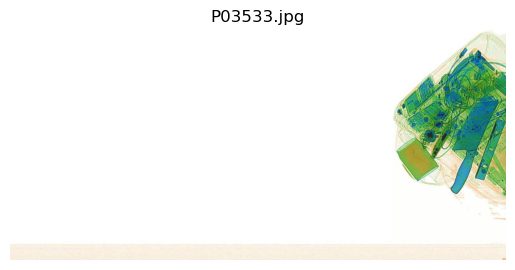

In [78]:
# Function to visualize an image tensor
def visualize_image(image_tensor, title="Image"):
    """
    Visualize a tensor image using matplotlib and return the figure.
    
    Parameters:
    image_tensor (torch.Tensor): The image tensor to visualize.
    title (str): The title of the image being displayed.
    
    Returns:
    matplotlib.figure.Figure: The figure object containing the plot.
    """
    try:
        # Check if the tensor is grayscale or RGB
        if image_tensor.shape[0] == 3:  # RGB
            # Convert tensor to numpy (C x H x W) -> (H x W x C)
            image_np = image_tensor.permute(1, 2, 0).numpy()
        elif image_tensor.shape[0] == 1:  # Grayscale
            # Squeeze the extra dimension for grayscale
            image_np = image_tensor.squeeze(0).numpy()
            plt.gray()  # Set the colormap to gray for visualization
        else:
            raise ValueError("Unexpected number of channels in the image tensor.")
        
        # Plot the image
        plt.imshow(image_np)
        plt.title(title)
        plt.axis('off')  # Hide axis
        plt.show()
    
    except Exception as e:
        print(f"Error visualizing image: {e}")

# Example: Visualize an image from the training set with a check for valid index
i = 7000  # or any other index

# Ensure 'i' is within bounds
if i < len(df_train_images):
    visualize_image(df_train_images['tensor'][i], title=df_train_images['filename'][i])
else:
    print(f"Index {i} is out of range. The dataset contains {len(df_train_images)} images.")

In [84]:
# First 5 Rows of the Image dataframe (Train)
df_train_images.head()

,filename,width,height,mode,tensor
0,P07773.jpg,499,473,RGB,"[[[tensor(176, dtype=torch.uint8), tensor(189,..."
1,P08440.jpg,394,414,RGB,"[[[tensor(219, dtype=torch.uint8), tensor(219,..."
2,P01302.jpg,901,785,RGB,"[[[tensor(255, dtype=torch.uint8), tensor(255,..."
3,P05164.jpg,507,360,RGB,"[[[tensor(227, dtype=torch.uint8), tensor(227,..."
4,P03273.jpg,666,418,RGB,"[[[tensor(255, dtype=torch.uint8), tensor(255,..."


In [12]:
# First 5 Rows of the Image dataframe (Test)
df_test_images.head()

,filename,width,height,mode,tensor
0,P03515.jpg,488,452,RGB,"[[[tensor(255, dtype=torch.uint8), tensor(255,..."
1,P07015.jpg,429,455,RGB,"[[[tensor(223, dtype=torch.uint8), tensor(223,..."
2,P05158.jpg,1479,730,RGB,"[[[tensor(181, dtype=torch.uint8), tensor(193,..."
3,P07029.jpg,636,660,RGB,"[[[tensor(222, dtype=torch.uint8), tensor(222,..."
4,P02151.jpg,848,684,RGB,"[[[tensor(255, dtype=torch.uint8), tensor(255,..."


In [67]:
# Checking the output of the tensor
df_train_images.iloc[0]['tensor']

tensor([[[176, 189, 202,  ..., 225, 225, 225],
         [176, 189, 202,  ..., 225, 225, 225],
         [176, 189, 202,  ..., 226, 226, 226],
         ...,
         [176, 189, 202,  ..., 224, 224, 224],
         [176, 189, 202,  ..., 224, 224, 224],
         [176, 189, 202,  ..., 224, 224, 224]],

        [[176, 189, 202,  ..., 225, 225, 225],
         [176, 189, 202,  ..., 225, 225, 225],
         [176, 189, 202,  ..., 226, 226, 226],
         ...,
         [176, 189, 202,  ..., 224, 224, 224],
         [176, 189, 202,  ..., 224, 224, 224],
         [176, 189, 202,  ..., 224, 224, 224]],

        [[174, 187, 200,  ..., 223, 223, 223],
         [174, 187, 200,  ..., 223, 223, 223],
         [174, 187, 200,  ..., 224, 224, 224],
         ...,
         [174, 187, 200,  ..., 222, 222, 222],
         [174, 187, 200,  ..., 222, 222, 222],
         [174, 187, 200,  ..., 222, 222, 222]]], dtype=torch.uint8)

Frequency of each class:
class
plier      5723
gun        4455
wrench     3028
knife      2609
scissor    1136
Name: count, dtype: int64


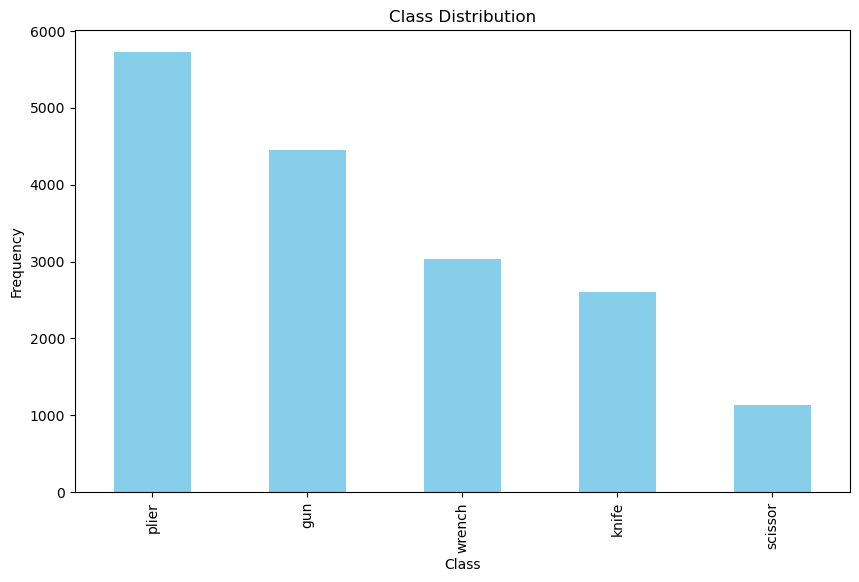


Percentage of each class in relation to the total dataset:
plier: 33.76%
gun: 26.28%
wrench: 17.86%
knife: 15.39%
scissor: 6.70%

Underrepresented classes (less than 20% of the most frequent class):
scissor - Count: 1136 (6.70%)


In [68]:
# Step 1: Calculate the frequency of each class in df_train_annotations

# First, check for missing values in the 'class' column
missing_class_values = df_train_annotations['class'].isnull().sum()

if missing_class_values > 0:
    print(f"\nWarning: There are {missing_class_values} missing values in the 'class' column.")
    # Handle missing values: drop rows with missing 'class' values
    df_train_annotations = df_train_annotations.dropna(subset=['class'])

# Calculate the frequency (count) of each class
class_counts = df_train_annotations['class'].value_counts()

# Print the class counts
print("Frequency of each class:")
print(class_counts)

# Step 2: Plot a bar chart showing the distribution of each class

# Set the figure size for better readability
plt.figure(figsize=(10,6))

# Create a bar plot of the class counts
class_counts.plot(kind='bar', color='skyblue')

# Add title and labels to the plot
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')

# Display the plot
plt.show()

# Step 3: Print out the percentage of each class in relation to the total dataset

# Calculate the total number of object instances (annotations)
total_instances = class_counts.sum()

# Calculate the percentage of each class
class_percentages = (class_counts / total_instances) * 100

# Print the percentages in a readable format
print("\nPercentage of each class in relation to the total dataset:")
for cls, pct in class_percentages.items():
    print(f"{cls}: {pct:.2f}%")

# Step 4: Output a list of filenames that belong to each class

# Create a dictionary to store filenames for each class
class_filenames = {}

# Group the dataframe by 'class' and get the unique filenames for each class
for cls, group in df_train_annotations.groupby('class'):
    # Get the list of unique filenames for the current class
    filenames = group['filename'].unique().tolist()
    class_filenames[cls] = filenames

# Step 5: Flag underrepresented classes that are significantly lower in frequency

# Find the count of the most frequent class
max_count = class_counts.max()

# Define the threshold for underrepresentation (e.g., less than 10% of the most frequent class)
threshold = 0.2 * max_count

# Identify underrepresented classes
underrepresented_classes = class_counts[class_counts < threshold].index.tolist()

# Print underrepresented classes
print("\nUnderrepresented classes (less than 20% of the most frequent class):")
if underrepresented_classes:
    for cls in underrepresented_classes:
        print(f"{cls} - Count: {class_counts[cls]} ({class_percentages[cls]:.2f}%)")
else:
    print("No underrepresented classes found based on the defined threshold.")

# Handling missing data or edge cases:
if df_train_annotations.empty:
    print("\nError: The annotations dataframe is empty after handling missing values.")
    print("Please check your data for issues.")
else:
    # Proceed with analysis
    pass

In [69]:
import pandas as pd

# Step 1: Calculate Total Knife and Scissor Frequencies

# Calculate the frequency of each class in the entire dataset
class_counts = df_train_annotations['class'].value_counts()

# Extract total frequencies for 'knife' and 'scissor'
knife_total_frequency = class_counts.get('knife', 0)
scissor_total_frequency = class_counts.get('scissor', 0)

print(f"Total frequency of 'knife' across the entire dataset: {knife_total_frequency}")
print(f"Total frequency of 'scissor' across the entire dataset: {scissor_total_frequency}")

# Step 2: Segregate the Images into Categories

# Create a mapping from filename to the set of classes it contains
image_classes = df_train_annotations.groupby('filename')['class'].unique().to_dict()

# Initialize lists for each category
knife_only_images = []
scissor_only_images = []
knife_and_scissor_images = []

# Categorize images based on the classes they contain
for filename, classes in image_classes.items():
    classes_set = set(classes)
    if classes_set == {'knife'}:
        knife_only_images.append(filename)
    elif classes_set == {'scissor'}:
        scissor_only_images.append(filename)
    elif classes_set == {'knife', 'scissor'}:
        knife_and_scissor_images.append(filename)

# Print the number of images in each category
print(f"\nNumber of knife-only images: {len(knife_only_images)}")
print(f"Number of scissor-only images: {len(scissor_only_images)}")
print(f"Number of knife+scissor images: {len(knife_and_scissor_images)}")

# Step 3: Calculate Frequencies in Each Category

# Function to calculate frequency of classes in given images
def calculate_frequency(filenames, class_name):
    # Filter annotations for the given filenames
    annotations = df_train_annotations[df_train_annotations['filename'].isin(filenames)]
    # Filter annotations for the specified class
    class_annotations = annotations[annotations['class'] == class_name]
    # Return the count of annotations
    return class_annotations.shape[0]

# Calculate frequencies for each category
knife_only_frequency = calculate_frequency(knife_only_images, 'knife')
scissor_only_frequency = calculate_frequency(scissor_only_images, 'scissor')
knife_in_knife_scissor_images = calculate_frequency(knife_and_scissor_images, 'knife')
scissor_in_knife_scissor_images = calculate_frequency(knife_and_scissor_images, 'scissor')

# Print the frequencies
print(f"\nFrequency of 'knife' in knife-only images: {knife_only_frequency}")
print(f"Frequency of 'scissor' in scissor-only images: {scissor_only_frequency}")
print(f"Frequency of 'knife' in knife+scissor images: {knife_in_knife_scissor_images}")
print(f"Frequency of 'scissor' in knife+scissor images: {scissor_in_knife_scissor_images}")

Total frequency of 'knife' across the entire dataset: 2609
Total frequency of 'scissor' across the entire dataset: 1136

Number of knife-only images: 416
Number of scissor-only images: 792
Number of knife+scissor images: 3

Frequency of 'knife' in knife-only images: 540
Frequency of 'scissor' in scissor-only images: 913
Frequency of 'knife' in knife+scissor images: 3
Frequency of 'scissor' in knife+scissor images: 4


In [72]:
## Need to Augment+Duplicate Knife+Scissors List 1 time
## Need to Augment+Duplicate Knife Only List 1 time and additional 3 images (416+3)
## Need to Augement+Duplicate Scissor Only List 3 times and additional 308 images (1584+308)